# Bài thực hành 5

In [167]:
#import dữ liệu
import pandas as pd
import numpy as np

## 1. Đọc dữ liệu

In [168]:
df = pd.read_excel("Data_PhanLopDL.xlsx")
df.head()

,Make,Colour,Odometer (KM),Doors,Class
0,Honda,White,35431.0,4.0,B
1,BMW,NaN,192714.0,5.0,B
2,Honda,White,NaN,4.0,C
3,NaN,White,154365.0,4.0,B
4,Nissan,Blue,181577.0,3.0,B


## 2. Xem các thông tin về dữ liệu

In [169]:
#xem thông tin về kích thước dữ liệu
df.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Class             object
dtype: object

In [170]:
#xem thông tin vê thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           967 non-null    object 
 1   Colour         975 non-null    object 
 2   Odometer (KM)  968 non-null    float64
 3   Doors          995 non-null    float64
 4   Class          1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [171]:
#Kiểm tra xem dữ liệu có thiếu hay không
df.isnull().sum()

Make             33
Colour           25
Odometer (KM)    32
Doors             5
Class             0
dtype: int64

In [172]:
# Nhìn vào kết quả có thể thấy chỉ cột class là không thiếu dữ liệu
#Xác định X, y
# Cho X bằng cột 'Make', 'Colour', 'Odometer', 'Doors'
# Cho y bằng cột 'Class'

In [173]:
# Xác định số lớp của y
y = df.Class

print("Unique: ",y.unique(), "\nUnique: ", y.nunique(),"\nValue count:\n", y.value_counts())

Unique:  ['B' 'C' 'A' 'D'] 
Unique:  4 
Value count:
 Class
B    451
A    275
C    199
D     75
Name: count, dtype: int64


## 3. Xử lý dữ liệu

In [174]:
#Kiểm tra xem dữ liệu có bị thiếu không
#lấy ra tất cả thông tin của hãng xe
df.Make.unique()

array(['Honda', 'BMW', nan, 'Nissan', 'Toyota'], dtype=object)

In [175]:
#Thay thế các dữ liệu trống bằng Porsche
df.Make = df.Make.replace(np.nan, 'Porsche')
df

,Make,Colour,Odometer (KM),Doors,Class
0,Honda,White,35431.0,4.0,B
1,BMW,NaN,192714.0,5.0,B
2,Honda,White,NaN,4.0,C
3,Porsche,White,154365.0,4.0,B
4,Nissan,Blue,181577.0,3.0,B
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,D
996,Nissan,White,155144.0,3.0,A
997,Nissan,Blue,66604.0,4.0,D
998,Honda,White,215883.0,4.0,A


In [176]:
#Kiểm tra cột colour
df.Make.unique()

array(['Honda', 'BMW', 'Porsche', 'Nissan', 'Toyota'], dtype=object)

In [177]:
df['Make'].value_counts()

Make
Toyota     386
Honda      292
Nissan     192
BMW         97
Porsche     33
Name: count, dtype: int64

In [178]:
#Xử lý dữ liệu cột màu
df.Colour.unique()

array(['White', nan, 'Blue', 'Red', 'Green', 'Black'], dtype=object)

In [179]:
df.Colour.value_counts()

Colour
White    395
Blue     312
Black     99
Red       91
Green     78
Name: count, dtype: int64

In [180]:
#Lấy giá trị màu xuất hiện nhiều nhất và gán cho những màu bị thiếu
max_color = df['Colour'].value_counts().idxmax()
df.Colour = df.Colour.replace(np.nan, max_color)
df.Colour.unique()

array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object)

In [181]:
#Kiểm tra cột Odometer (KM)
df['Odometer (KM)'].unique()

array([ 35431., 192714.,     nan, 154365., 181577.,  42652., 163453.,
        43120., 130538.,  51029., 167421.,  17119., 102303., 199833.,
       205592.,  96742., 194189.,  67991., 215820., 124844.,  30615.,
       148744., 130075., 172718., 125819., 180390.,  82783., 112004.,
        34024., 108569., 203795., 153554.,  71949.,  38186.,  69888.,
       146430., 109868., 177894., 189209., 200490., 141617., 213893.,
       231057., 100938., 243969., 107096., 184878., 161068.,  77646.,
       246817., 109384.,  79937.,  82039., 162176.,  97375., 230908.,
       208124.,  57198.,  47019., 170085., 178796., 223390.,  93054.,
        42459.,  37513., 123121., 204213., 116986., 191232., 156478.,
       140465., 126669., 238425., 186146., 149879.,  34097., 248447.,
        61651.,  24219., 209359., 108415.,  61892.,  90249., 197844.,
        53765., 115183., 130783., 143707.,  29856., 133433., 147455.,
        48069., 146233., 224657., 150582.,  71329., 229206., 218803.,
       184869., 1297

In [182]:
#Xóa các dòng thiếu dữ liệu
df = df.dropna(subset=['Odometer (KM)'])
df.head()

,Make,Colour,Odometer (KM),Doors,Class
0,Honda,White,35431.0,4.0,B
1,BMW,White,192714.0,5.0,B
3,Porsche,White,154365.0,4.0,B
4,Nissan,Blue,181577.0,3.0,B
5,Honda,Red,42652.0,4.0,C


In [183]:
#Kiêm tra cột door
df.Doors.unique()

array([ 4.,  5.,  3., nan])

In [184]:
#thay thế thành 2 cửa
df.Doors = df.Doors.replace(np.nan, 2)
df.Doors.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18468\2348146177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Doors = df.Doors.replace(np.nan, 2)


array([4., 5., 3., 2.])

In [185]:
#tách X
X = df.iloc[:, :-1]
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,White,192714.0,5.0
3,Porsche,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
5,Honda,Red,42652.0,4.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,Nissan,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [186]:
#tách y
y = df.iloc[:, -1]
y

0      B
1      B
3      B
4      B
5      C
      ..
995    D
996    A
997    D
998    A
999    B
Name: Class, Length: 968, dtype: object

In [187]:
#Xử lý dữ liệu cho X
#Chuyển kiểu cho 2 thuộc tính Make và Colour: định danh -> số
X = pd.get_dummies(X, dtype = int, columns = ['Make', 'Colour'])
X.head(10)

,Odometer (KM),Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Porsche,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431.0,4.0,0,1,0,0,0,0,0,0,0,1
1,192714.0,5.0,1,0,0,0,0,0,0,0,0,1
3,154365.0,4.0,0,0,0,1,0,0,0,0,0,1
4,181577.0,3.0,0,0,1,0,0,0,1,0,0,0
5,42652.0,4.0,0,1,0,0,0,0,0,0,1,0
6,163453.0,4.0,0,0,0,0,1,0,1,0,0,0
7,43120.0,4.0,0,1,0,0,0,0,0,0,0,1
8,130538.0,4.0,0,0,1,0,0,0,0,0,0,1
9,51029.0,4.0,0,1,0,0,0,0,1,0,0,0
10,167421.0,4.0,0,0,1,0,0,0,0,0,0,1


In [188]:
# Chuẩn hóa thuộc tính Odometer (KM) về miền [1,5]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X["Odometer (KM)"] = scaler.fit_transform(X[["Odometer (KM)"]])
X

,Odometer (KM),Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Porsche,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,0.105472,4.0,0,1,0,0,0,0,0,0,0,1
1,0.761606,5.0,1,0,0,0,0,0,0,0,0,1
3,0.601626,4.0,0,0,0,1,0,0,0,0,0,1
4,0.715146,3.0,0,0,1,0,0,0,1,0,0,0
5,0.135596,4.0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.107095,4.0,0,0,0,0,1,1,0,0,0,0
996,0.604876,3.0,0,0,1,0,0,0,0,0,0,1
997,0.235516,4.0,0,0,1,0,0,0,1,0,0,0
998,0.858259,4.0,0,1,0,0,0,0,0,0,0,1


## 4. Phân lớp dữ liệu

In [189]:
X.shape, y.shape

((968, 12), (968,))

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((619, 12), (349, 12), (619,), (349,))

### KNN - K láng giềng gần nhất

In [191]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_Cls = KNeighborsClassifier(n_neighbors = 11)
knn_Cls.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [192]:
y_pred_knn = knn_Cls.predict(X_test)
print(pd.DataFrame({"y_test":y_test, "y_predicted":y_pred_knn}).head(20))

    y_test y_predicted
872      C           A
242      B           B
121      A           B
526      B           B
204      B           B
710      B           B
411      D           D
788      D           B
853      A           B
663      B           A
184      B           A
330      A           A
112      C           C
447      D           B
783      B           A
896      A           B
101      B           B
84       B           B
166      A           B
52       B           B


In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report, recall_score

In [194]:
 #Đánh giá mô hình
print("Confusion Matrix: ")
KNN_conf = confusion_matrix(y_test, y_pred_knn, labels = ["A", "B", "C", "D"])
print(KNN_conf, "\n")

Confusion Matrix: 
[[ 32  54   4   2]
 [ 40 101  10   6]
 [ 13  44  11   8]
 [  2  13   0   9]] 



In [195]:
acc_KNN = accuracy_score(y_test, y_pred_knn) * 100
print('accuracy_score: ', acc_, "\n")

accuracy_score:  18.911174785100286 



In [196]:
print("Precision: ", precision_score(y_test, y_pred_knn, labels = ["A", "B", "C", "D"], average = None) * 100, "\n")

Precision:  [36.7816092  47.64150943 44.         36.        ] 



In [197]:
print("Recall: ", recall_score(y_test, y_pred_knn, labels = ["A", "B", "C", "D"], average = None), "\n")

Recall:  [0.34782609 0.6433121  0.14473684 0.375     ] 



In [198]:
print("F1 score: ", f1_score(y_test, y_pred_knn, labels = ["A", "B", "C", "D"], average = None), "\n")

F1 score:  [0.3575419  0.54742547 0.21782178 0.36734694] 



In [199]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           A       0.37      0.35      0.36        92
           B       0.48      0.64      0.55       157
           C       0.44      0.14      0.22        76
           D       0.36      0.38      0.37        24

    accuracy                           0.44       349
   macro avg       0.41      0.38      0.37       349
weighted avg       0.43      0.44      0.41       349



### DT Classifier
* cây quyết định

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
DT_class = DecisionTreeClassifier(criterion = 'entropy')
DT_class.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [202]:
y_pred_knn = DT_class.predict(X_test)

print(pd.DataFrame({"y_predicted": y_pred_knn, "y_test": y_test}).head(15))

    y_predicted y_test
872           A      C
242           B      B
121           B      A
526           A      B
204           B      B
710           B      B
411           D      D
788           D      D
853           A      A
663           B      B
184           C      B
330           A      A
112           A      C
447           D      D
783           C      B


In [203]:
 #Đánh giá mô hình
print("Confusion Matrix: ")
DT_conf = confusion_matrix(y_test, y_pred_knn, labels = ["A", "B", "C", "D"])
print(DT_conf, "\n")

Confusion Matrix: 
[[27 54  9  2]
 [36 83 28 10]
 [14 33 19 10]
 [ 1  8  2 13]] 



In [204]:
acc_DT = accuracy_score(y_test, y_pred_knn) * 100
print('accuracy_score: ', acc_, "\n")

accuracy_score:  18.911174785100286 



In [205]:
print("Precision: ", precision_score(y_test, y_pred_knn, labels = ["A", "B", "C", "D"], average = None) * 100, "\n")

Precision:  [34.61538462 46.62921348 32.75862069 37.14285714] 



In [206]:
print("Recall: ", recall_score(y_test, y_pred_knn, labels = ["A", "B", "C", "D"], average = None), "\n")

Recall:  [0.29347826 0.52866242 0.25       0.54166667] 



In [207]:
print("F1 score: ", f1_score(y_test, y_pred_knn, labels = ["A", "B", "C", "D"], average = None), "\n")

F1 score:  [0.31764706 0.49552239 0.28358209 0.44067797] 



In [208]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           A       0.35      0.29      0.32        92
           B       0.47      0.53      0.50       157
           C       0.33      0.25      0.28        76
           D       0.37      0.54      0.44        24

    accuracy                           0.41       349
   macro avg       0.38      0.40      0.38       349
weighted avg       0.40      0.41      0.40       349



### Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB

In [210]:
gnb_class = GaussianNB()
gnb_class.fit(X_train, y_train)

GaussianNB()

In [211]:
y_predicted = gnb_class.predict(X_test)
print(pd.DataFrame({"y_predicted": y_predicted, "y_test": y_test}).head(15))

    y_predicted y_test
872           D      C
242           D      B
121           D      A
526           D      B
204           D      B
710           D      B
411           D      D
788           D      D
853           D      A
663           A      B
184           A      B
330           D      A
112           D      C
447           D      D
783           D      B


In [212]:
 #Đánh giá mô hình
print("Confusion Matrix: ")
NB_conf = confusion_matrix(y_test, y_predicted, labels = ["A", "B", "C", "D"])
print(NB_conf, "\n")

Confusion Matrix: 
[[43  0  0 49]
 [63  0  2 92]
 [26  0  2 48]
 [ 2  1  0 21]] 



In [213]:
acc_NB = accuracy_score(y_test, y_predicted) * 100
print('accuracy_score: ', acc_, "\n")

accuracy_score:  18.911174785100286 



In [214]:
print("Precision: ", precision_score(y_test, y_predicted, labels = ["A", "B", "C", "D"], average = None) * 100, "\n")

Precision:  [32.08955224  0.         50.         10.        ] 



In [215]:
print("Recall: ", recall_score(y_test, y_predicted, labels = ["A", "B", "C", "D"], average = None), "\n")

Recall:  [0.4673913  0.         0.02631579 0.875     ] 



In [216]:
print("F1 score: ", f1_score(y_test, y_predicted, labels = ["A", "B", "C", "D"], average = None), "\n")

F1 score:  [0.38053097 0.         0.05       0.17948718] 



In [217]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           A       0.32      0.47      0.38        92
           B       0.00      0.00      0.00       157
           C       0.50      0.03      0.05        76
           D       0.10      0.88      0.18        24

    accuracy                           0.19       349
   macro avg       0.23      0.34      0.15       349
weighted avg       0.20      0.19      0.12       349



### Vẽ biểu đồ so sánh

In [218]:
import matplotlib.pyplot as plt

In [219]:
x = ["Accuracy KNN", "Accuracy DT","Accuracy NB"]
y = [acc_KNN, acc_DT, acc_NB]

Text(0.5, 1.0, 'So sánh độ chính xác giữa các mô hình')

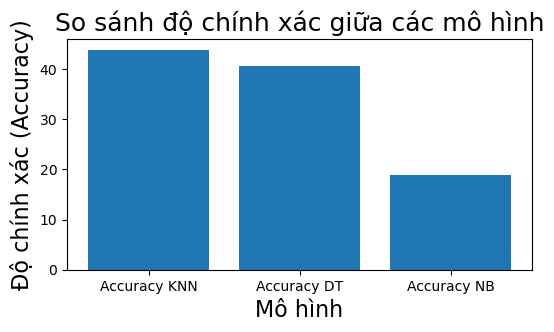

In [220]:
plt.figure(figsize=(6,3))
plt.bar(x,y)
plt.xlabel("Mô hình",fontsize=16)
plt.ylabel("Độ chính xác (Accuracy)", fontsize=16)
plt.title("So sánh độ chính xác giữa các mô hình",fontsize=18)